## **Praktikum Pengolahan Sinyal Digital**



---


* Nama: Rifko Satrio Rahmadani
* NIM: 231344057
* Kelas: 2B-TNK


#Modul 7 - Korelasi

Korelasi

Pada modul sebelumnya, kita telah mengenal contoh operasi konvolusi yang hubungannya diberikan oleh persamaan

$$y[n]=\sum_{k=0}^{M-1}h[k]\cdot x[n-k]$$

secara umum $x[k]$ didefinisikan sebagai sinyal input dan $h[k]$ adalah respon impuls dari sistem. Notasi konvolusi dapat ditulis sebagai berikut

$$y[n]=h[n]\ast x[n] $$

Sementara korelasi ditunjukkan dengan notasi

$$y[n]=h[n]\ast x[-n] $$



Formula matematikanya sangat mirip. Tetapi situasinya jauh berbeda. Konvolusi memberikan hubungan antara input, output dan response impuls dari suatu sistem linier. Sedangkan korelasi digunakan untuk mencari bentuk gelombang yang diketahui diantara lingkungan yang penuh derau

Contoh yang paling sederhana adalah penggunaan radar dalam mendeteksi benda logam (seperti pesawat terbang atau helikopter). Pada skenario ini, radar mengirim sinyal tertentu (misalnya pulsa segitiga). Lalu pada jalur pemancarannya sinyal tersebut menumbuk suatu benda padat (misalnya badan pesawat) dan kemudian, sebagian dari energi sinyalnya dipantulkan kembali ke radar penerima yang terletak di dekat radar pemancar. Radar penerima akan menerima sinyal yang mengandung:


Di praktikum ini akan dicoba untuk mensimulasikan suatu transmisi sinyal dari transmitter ke receiver yang mana ia mengalami delay dan tambahan derau

## Soal

Suatu pulsa segitiga sama sisi yang memiliki frekuensi 2 hz, dengan amplitudo minimal 0 dan amplitudo puncak 10. Sinyal yang dikirimkan sebanyak dua pulsa.
Sinyal yang dikirimkan terkena suatu noise dengan amplitudonya maksimum sebesar 10% dari sinyal pengiriman.
Penerimaan sinyal mengalami delay, sehingga dalam 2 detik pertama yang diterima hanya noise saja, setelah itu baru mendapatkan sinyal transmisi.


### Tahap 1. Import library yang dibutuhkan

Masukkan syntax untuk import library yang sekiranya dibutuhkan untuk menyelesaikan soal

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import signal as sgn
import matplotlib
import matplotlib.pyplot as plt

### Tahap 2. Membuat Sumber sinyal

Buat sumber sinyal yang dispesifikasikan sesuai soal, menggunakan sinyal sawtooth, dan hasil sinyal gunakan np.abs() agar sinyal selalu positif. Dan plot menggunakan stem

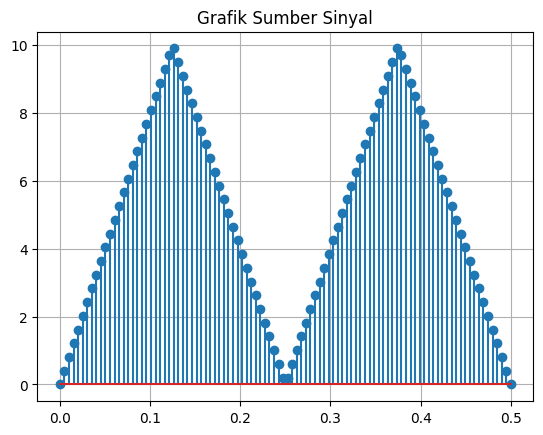

In [ ]:
f=2
fs=100
fasa_awal=90
A=10
B=0
dur=0.5
t = np.linspace(0,dur,fs)
s = B+A*sgn.sawtooth(2*np.pi*f*t+np.deg2rad(fasa_awal),0.5)
s = np.abs(s)

plt.stem(t, s)
plt.title('Grafik Sumber Sinyal')
plt.grid()
plt.show()

pada tahap 1 tersebut, program yang telah saya kerjakan intinya membuat sumber sinyal menggunakan fungsi sawtooth dengan frekuensi 2 Hz dan amplitudo maksimal 10, lalu mengubahnya menjadi sinyal yang selalu positif dengan intruksi np.abs(). Sinyal kemudian ditampilkan dalam bentuk grafik menggunakan plt.stem() untuk menunjukkan bentuk pulsa secara diskrit.

*   f = 2: Frekuensi sinyal sebesar 2 Hz.
*   fs = 100: Frekuensi sampling yang saya gunakan sebesar 100 Hz agar sinyal terlihat halus saat diplot.
*   fasa_awal = 90: Menambahkan fase awal 90 derajat untuk menggeser sinyal ke kiri atau kanan.
*   A = 10, B = 0: Parameter untuk mengatur tinggi dan posisi sinyal (amplitudo maksimum 10).
*   s = B+A*sgn.sawtooth(...) : Digunakan untuk membuat sinyal berbentuk segitiga/sawtooth.
*   s = np.abs(s): Digunakan agar nilai sinyal selalu positif.
*   plt.stem(t, s), plt.title('Grafik Sumber Sinyal'), dan plt.show(): untuk menampilkan/menunjukkan apa yang ada pada gambar grafik hasilnya









### Tahap 3. Hitung perkiraan total durasi sinyal dan buat array untu

In [ ]:
# t_total=np_linspace(0, dur_akhir, fs*dur)
h = np.zeros(2*fs)
h[len(h) - 1] = np.array(1)

t_total=np.linspace(0,3,(3*100) - 1)
print(t_total)

[0.         0.01006711 0.02013423 0.03020134 0.04026846 0.05033557
 0.06040268 0.0704698  0.08053691 0.09060403 0.10067114 0.11073826
 0.12080537 0.13087248 0.1409396  0.15100671 0.16107383 0.17114094
 0.18120805 0.19127517 0.20134228 0.2114094  0.22147651 0.23154362
 0.24161074 0.25167785 0.26174497 0.27181208 0.28187919 0.29194631
 0.30201342 0.31208054 0.32214765 0.33221477 0.34228188 0.35234899
 0.36241611 0.37248322 0.38255034 0.39261745 0.40268456 0.41275168
 0.42281879 0.43288591 0.44295302 0.45302013 0.46308725 0.47315436
 0.48322148 0.49328859 0.5033557  0.51342282 0.52348993 0.53355705
 0.54362416 0.55369128 0.56375839 0.5738255  0.58389262 0.59395973
 0.60402685 0.61409396 0.62416107 0.63422819 0.6442953  0.65436242
 0.66442953 0.67449664 0.68456376 0.69463087 0.70469799 0.7147651
 0.72483221 0.73489933 0.74496644 0.75503356 0.76510067 0.77516779
 0.7852349  0.79530201 0.80536913 0.81543624 0.82550336 0.83557047
 0.84563758 0.8557047  0.86577181 0.87583893 0.88590604 0.89597

### Tahap 4. Sumber Sinyal terdelay

Delay dapat dibuat dengan mengkonvolusikan suatu array [0 0 0 0 0 ..... 0 0 1] terhadap sumber sinyal. Jumlah 0 dalam array ditentukan dari durasi delay dikalikan dengan frekuensi sampling yang digunakan

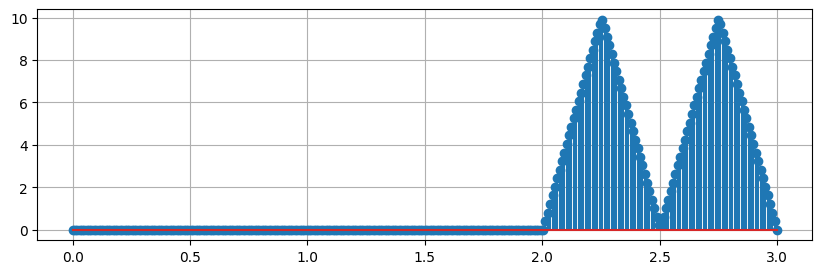

In [ ]:
#tulis program disini
fungsi_delay = np.convolve(h,s)

plt.figure(figsize=(10, 3))
plt.stem(t_total,fungsi_delay)
plt.grid()
plt.show()

Pada tahap 4 tersebut, Program nya itu meniru proses di mana sinyal tidak langsung diterima yang berarti boleh di sebut delay, tapi muncul setelah waktu tunda tertentu. pemahaman terkait Konvolusi digunakan untuk menciptakan efek tunda tersebut.



*   fungsi_delay = np.convolve(h, s): Melakukan konvolusi antara array h (yang mengandung delay) dan sumber sinyal
*   plt.figure(figsize=(10, 3)): Mengatur ukuran tampilan grafik (lebar = 10, tinggi = 3) agar grafik bisa disesuaikan
*   plt.stem(t_total, fungsi_delay): Membuat plot (stem plot) dari sinyal yang sudah tertunda terhadap waktu total (t_total).
*   plt.grid() dan plt.show(): untuk menampilkan/menunjukkan apa yang ada pada gambar grafik hasilnya

### Tahap 5. Buat Sinyal noise

Buat suatu sinyal noise (gunakan noise uniform) sesuai spesifikasi soal sepanjang total durasi sinyal frekuensi sampling yang digunakan harus sama dengan frekuensi sampling yang digunakan pada pembuatan sinyal sumber

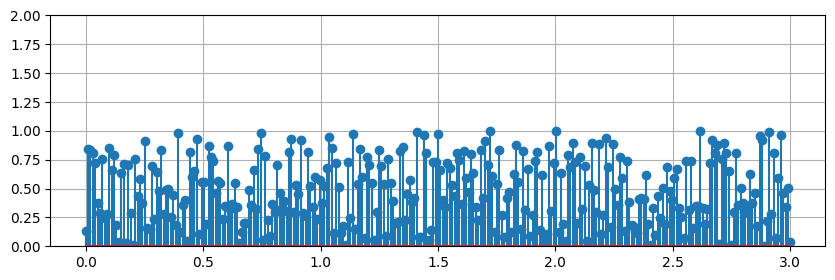

In [ ]:
#tulis program disini
def generate_uniform_noise(dur, fsp, low=-1, high=1):
    samples = int((3 * fs) - 1)
    return np.random.uniform(low, high, samples)

noise = generate_uniform_noise((t_total), 1, 0,1)

plt.figure(figsize=(10, 3))
plt.stem(t_total, noise)
plt.ylim(0, 2)
plt.grid()
plt.show()

Pada Tahap 5 tersebut, Program ini membuat sinyal gangguan (noise) yang nilainya acak dan berubah-ubah di setiap titik waktu yang tergantu dari frekuensi sampling yang digunakan. Noise ini akan dipakai untuk menggantikan sinyal selama 2 detik pertama sebelum sumber sinnyal datang.
*   noise = generate_uniform_noise((t_total), 1, 0,1): untuk membuat sinyal noise acak.
*   plt.figure(figsize=(10, 2)): Mengatur ukuran tampilan grafik (lebar = 10, tinggi = 2) agar grafik bisa disesuaikan
*   plt.stem(t_total, noise): Membuat plot (stem plot) dari noise atau ganggguan terhadap waktu total (t_total).
*   plt.ylim(0,2): membatasi rentang tampilan grafik, menyesuaikan dengan yang pengguna inginkan yang terpenting terlihat dengan jelas
*   plt.grid() dan plt.show(): untuk menampilkan/menunjukkan apa yang ada pada gambar grafik hasilnya

### Tahap 6. Buat sinyal akhir

Gabungkan sinyal noise dengan sumber sinyal terdelay dengan prinsip superposisi

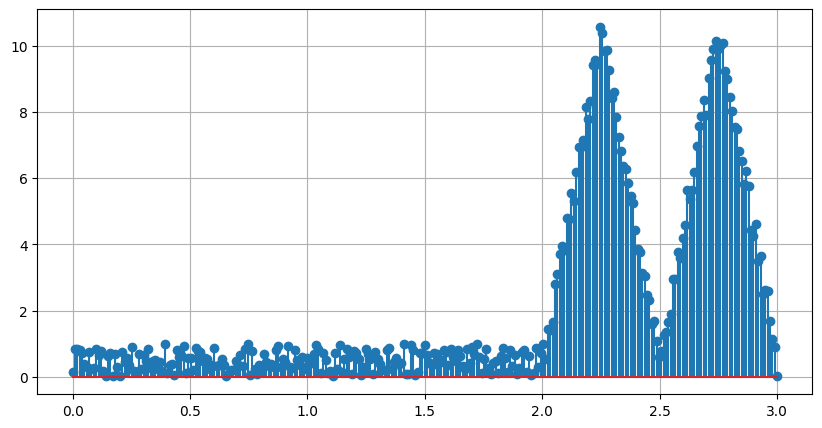

In [ ]:
# #tulis program disini
sinyal_akhir = fungsi_delay + noise

plt.figure(figsize=(10, 5))
plt.stem(t_total, sinyal_akhir)
plt.grid()
plt.show()


Pada Tahap 6 tersebut, program ini membuat sinyal noise dengan delay, yang digabungkan sehingga terlihat pada tampilan grafiknya dari detik o sampai detik ke 2 yang berarti 2 deetik, sinyal nya itu delay dan ada noisenya. kemudian setelah melewati 2 detik tersebut sinyal muncul.
*   sinyal_akhir = fungsi_delay + noise: untuk menggabungkan sinyal yang tertundanya dengan tambahan noise atau gangguan
*   plt.figure(figsize=(10, 5)): Mengatur ukuran tampilan grafik (lebar = 10, tinggi = 5) agar grafik bisa disesuaikan
*   plt.stem(t_total, noise): Membuat plot (stem plot) dari delay + noise aterhadap waktu total (t_total).
*   plt.grid() dan plt.show(): untuk menampilkan/menunjukkan apa yang ada pada gambar grafik hasilnya

### Tahap 7. Korelasi

Konvolusikan sinyal akhir dengan sumber sinyal awal, dan amati hasilnya

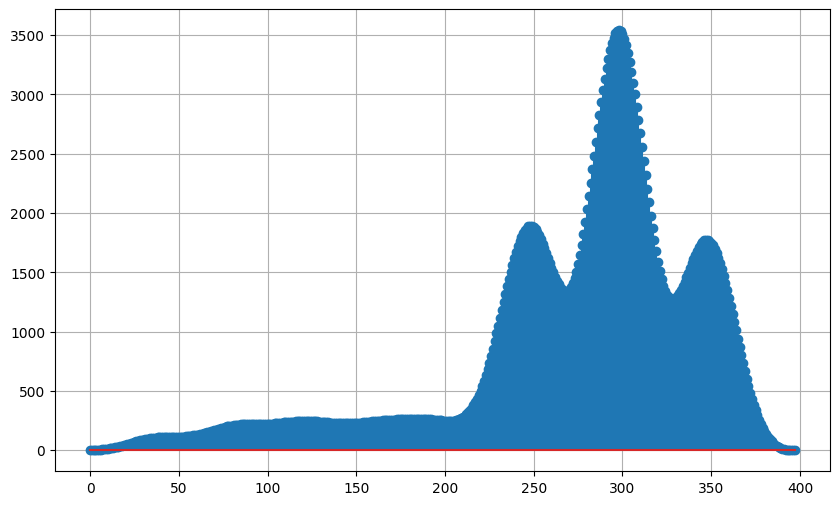

In [ ]:
#tulis program disini
# np.correlate(sinyal_akhir, sumbersinyal)
kor = np.convolve( s, sinyal_akhir)

plt.figure(figsize=(10, 6))
plt.stem(kor)
plt.grid()
plt.show()


Pada tahap 7 tersebut, Program ini bertujuan untuk mencari kemiripan antara dua sinyal, yaitu sumber sinyal dan sinyal akhir, dengan menggunakan operasi konvolusi meskipun seharusnya menggunakan korelasi untuk akurasi. Proses ini dilakukan dengan cara menggeser sumber sinyal di sepanjang sinyal akhir dan menghitung seberapa mirip keduanya pada setiap posisi. dan setelah itu jika ingin semakin jelas bisa gunakan mode='valid' ataunp.correlatenya yang akan menmbagi dua sinyalnya



---


© Prof. Hertog Nugroho, Teguh Ginanjar S.T., M.T, Muhammad Yusuf Fadhlan, SST., M.Sc & Nila Novitasari SST., MSc.

Politeknik Negeri Bandung (2025)